In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10, 8]

In [111]:
data = pd.read_csv("profiles.csv")

##### First select a problem that you can answer using a machine learning approach
Let's try to predict, if someone is cat person or dog person.

In [112]:
data.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [113]:
data.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [114]:
data.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [115]:
data["pets"].value_counts(dropna=False)

NaN                                19921
likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: pets, dtype: int64

# -----------------
# Let's chech how age looks like in the data

# -----------------

<AxesSubplot:xlabel='age', ylabel='Count'>

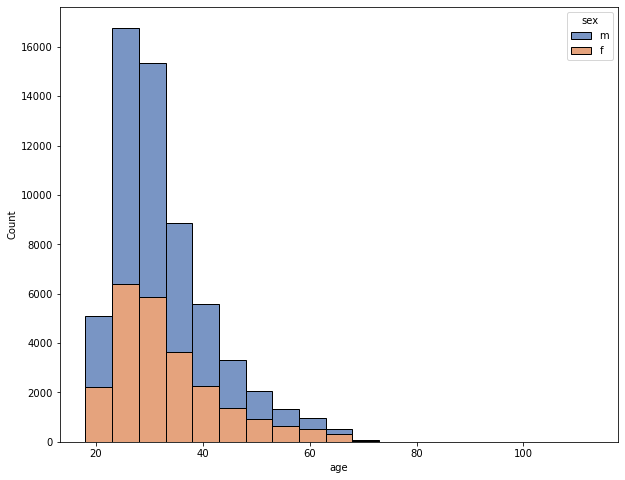

In [116]:
sns.histplot(data=data, x="age",binwidth=5,hue="sex",palette=("deep"),multiple = "stack")

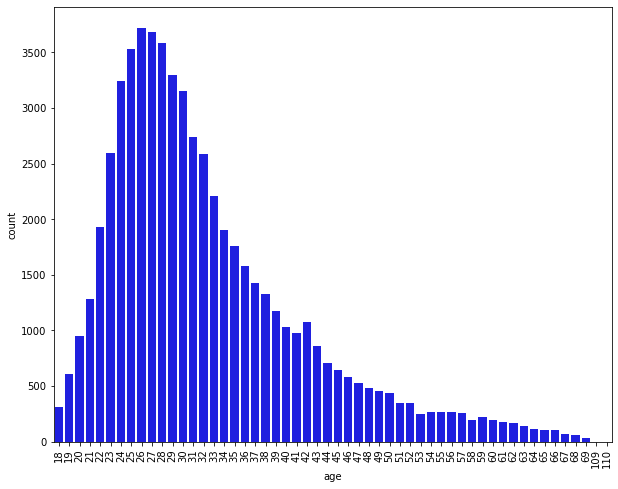

In [117]:
ax = sns.countplot(data=data, x="age",color='blue')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

Text(0.5, 0, 'age')

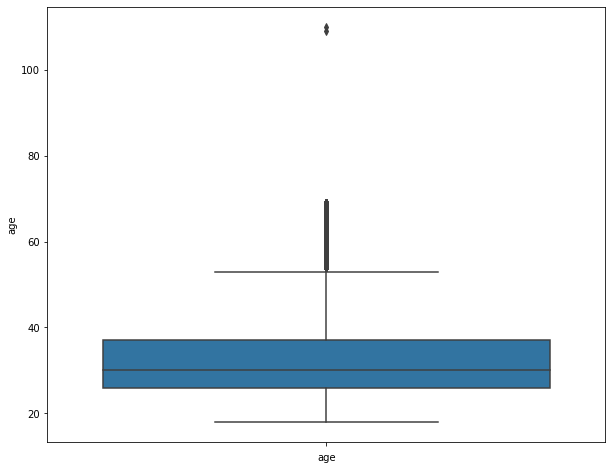

In [118]:
sns.boxplot(y=data["age"])
plt.xlabel('age')

# ---------------
## Insight about age
Age 26-37 is very common in the data. There are two outliers (age 109 and 110). The age distribution of men and women is pretty same.
# ---------------

<AxesSubplot:xlabel='count', ylabel='body_type'>

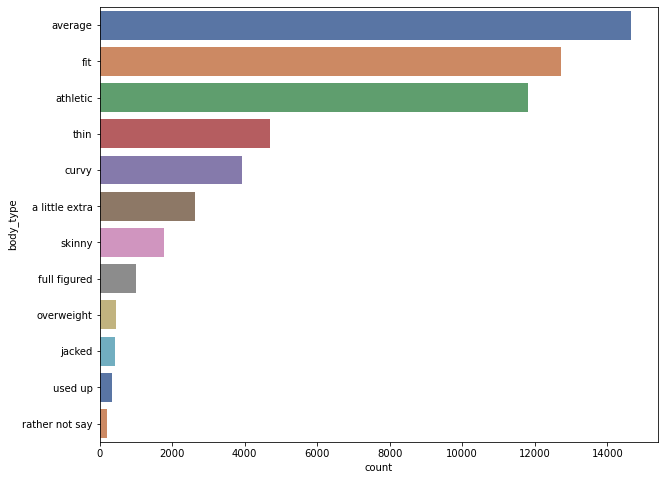

In [119]:
sns.countplot(data=data, y="body_type",palette=("deep"),order = data['body_type'].value_counts().index)

In [120]:
data["body_type"].value_counts(dropna=False)

average           14652
fit               12711
athletic          11819
NaN                5296
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='body_type'>

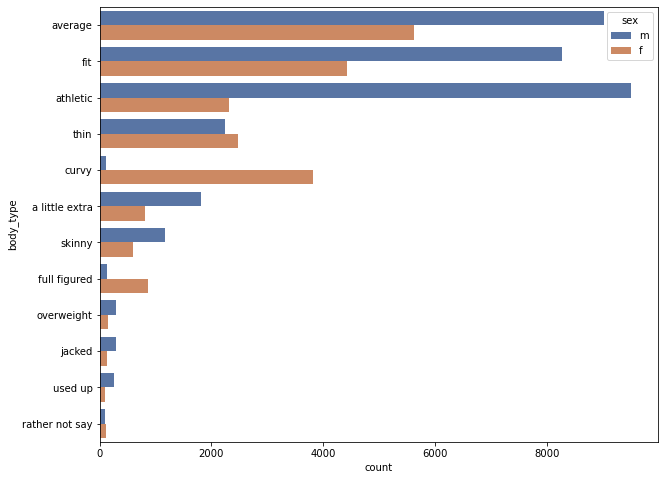

In [121]:
sns.countplot(data=data, y="body_type",palette=("deep"),hue='sex',order = data['body_type'].value_counts().index)

the body tipe curvy is not popular in males.

In [122]:
data["diet"].value_counts(dropna=False)

NaN                    24395
mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: diet, dtype: int64

<AxesSubplot:xlabel='count', ylabel='diet'>

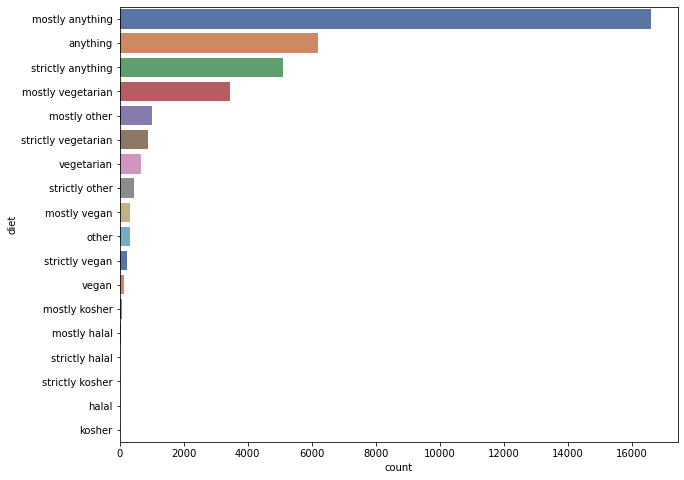

In [123]:
sns.countplot(data=data, y="diet",palette=("deep"),order = data['diet'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='diet'>

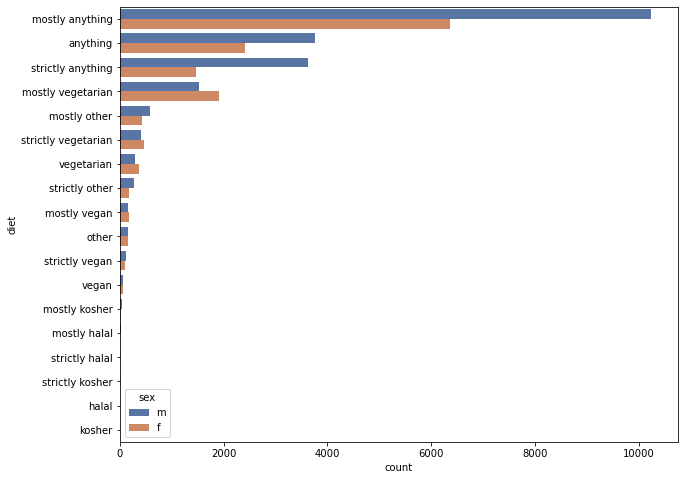

In [124]:
sns.countplot(data=data, y="diet",palette=("deep"),hue='sex',order = data['diet'].value_counts().index)

Eating anything is a common trend in the data. The most common specific diet is vegetarian.

In [125]:
data["drinks"].value_counts(dropna=False)

socially       41780
rarely          5957
often           5164
not at all      3267
NaN             2985
very often       471
desperately      322
Name: drinks, dtype: int64

<AxesSubplot:xlabel='count', ylabel='drinks'>

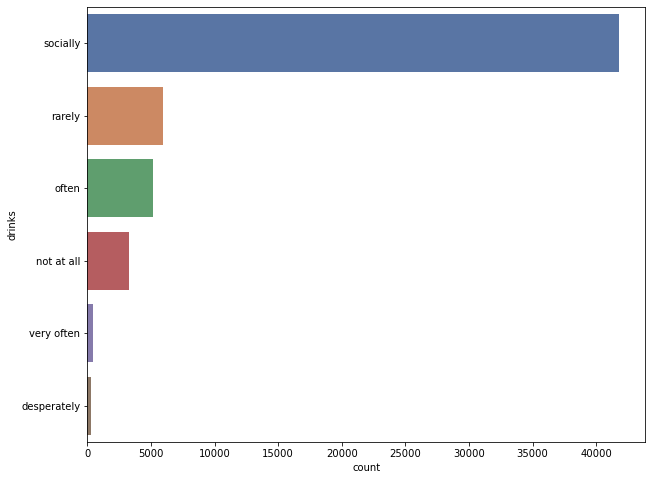

In [126]:
sns.countplot(data=data, y="drinks",palette=("deep"),order = data['drinks'].value_counts().index)

In [127]:
#sns.countplot(data=data, y="drinks",palette=("deep"),hue='pets',order = data['drinks'].value_counts().index)

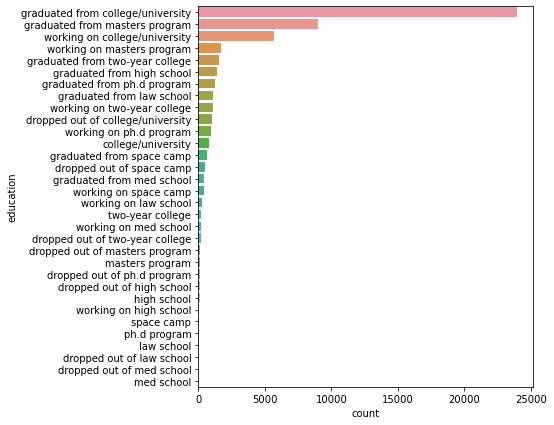

In [128]:
plt.figure(figsize=(6,7))

sns.countplot(data=data, y="education",order = data['education'].value_counts().index);

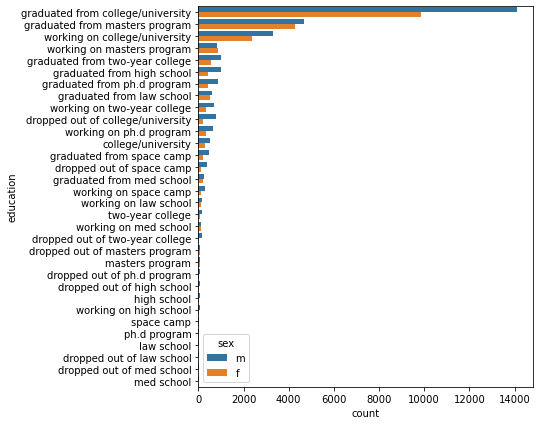

In [129]:
plt.figure(figsize=(6,7))

sns.countplot(data=data,hue="sex", y="education",order = data['education'].value_counts().index);

## answers will be simplified

In [130]:
data["pets"].value_counts(dropna=False)

NaN                                19921
likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: pets, dtype: int64

#let's make 4 category, dog person, cat person, all, none

In [131]:
def cleaner(string):
    if string == "likes dogs and likes cats":
        return "all"
    elif string == "likes dogs":
        return "dog person"
    elif string == "likes dogs and has cats":
        return "all"
    elif string == "has dogs":
        return "dog person"
    elif string == "has dogs and likes cats":
        return "all"
    elif string == "likes dogs and dislikes cats":
        return "dog person"
    elif string == "has dogs and has cats":
        return "all"
    elif string == "has cats":
        return "cat person"
    elif string == "likes cats":
        return "cat person"
    elif string == "has dogs and dislikes cats":
        return "dog person"
    elif string == "dislikes dogs and likes cats":
        return "cat person"
    elif string == "dislikes dogs and dislikes cats":
        return "none"
    elif string == "dislikes cats ":
        return "dog person"
    elif string == "dislikes dogs and has cats":
        return "cat person"
    elif string == "dislikes dogs":
        return "cat person"
    else:
        return np.nan

In [132]:
data['clean_pets'] = data.apply(lambda row : cleaner(row['pets']), axis = 1)

In [133]:
data["clean_pets"].value_counts(dropna=False)

all           22934
NaN           20043
dog person    13939
cat person     2834
none            196
Name: clean_pets, dtype: int64

## we need to choose some variables to include in modelling step

In [134]:
data.columns.tolist()

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status',
 'clean_pets']

In [135]:
selected_cols = ["diet","income","religion","sex","sign","speaks","clean_pets"]

### income "-1" means NaN i belive. it needs to be cleaned.

In [136]:
data["income"].replace(-1, np.nan, inplace=True)

In [137]:
df = data[selected_cols].dropna()

In [138]:
df

,diet,income,religion,sex,sign,speaks,clean_pets
1,mostly other,80000.0,agnosticism but not too serious about it,m,cancer,"english (fluently), spanish (poorly), french (...",all
11,mostly anything,40000.0,christianity and very serious about it,m,leo but it doesn&rsquo;t matter,"english (fluently), sign language (poorly)",cat person
14,mostly anything,50000.0,catholicism,f,taurus,english,all
72,mostly anything,150000.0,agnosticism and very serious about it,m,pisces and it&rsquo;s fun to think about,"english (poorly), spanish (poorly)",all
94,mostly anything,40000.0,agnosticism and very serious about it,m,libra,english (fluently),all
...,...,...,...,...,...,...,...
59855,mostly anything,1000000.0,buddhism,m,gemini,"english, chinese (poorly)",all
59871,anything,20000.0,christianity but not too serious about it,f,capricorn,english,dog person
59907,anything,20000.0,atheism and somewhat serious about it,m,taurus and it&rsquo;s fun to think about,"english (fluently), spanish (okay)",dog person
59930,anything,70000.0,other,m,aries and it&rsquo;s fun to think about,"english, spanish",all


In [139]:
for col in selected_cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [140]:
df

,clean_pets,diet_anything,diet_mostly anything,diet_mostly halal,diet_mostly kosher,diet_mostly other,diet_mostly vegan,diet_mostly vegetarian,diet_other,diet_strictly anything,...,"speaks_english, tagalog (fluently)","speaks_english, tagalog (fluently), german, spanish","speaks_english, tagalog (okay)","speaks_english, tagalog (poorly)","speaks_english, tagalog, chinese","speaks_english, tagalog, spanish","speaks_english, vietnamese","speaks_english, vietnamese (fluently), sign language (poorly)","speaks_english, yiddish (fluently), tagalog (fluently), sanskrit (fluently), lisp (fluently)","speaks_english, yiddish (poorly)"
1,all,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,cat person,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,all,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,all,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,all,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59855,all,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59871,dog person,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59907,dog person,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59930,all,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
df.clean_pets.value_counts()

all           2984
dog person    1274
cat person     318
none            32
Name: clean_pets, dtype: int64

In [143]:
col_length = len(df.columns)

#Y is the target column, X has the rest
X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0:1]
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state = 0)

In [144]:
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [146]:
lr_model = LogisticRegression(multi_class="multinomial").fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)

/opt/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [147]:
lr_predictions

array(['all', 'all', 'dog person', ..., 'all', 'all', 'all'], dtype=object)

In [148]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

         all       0.71      0.95      0.81      2388
  cat person       0.75      0.02      0.05       251
  dog person       0.72      0.32      0.44      1021
        none       1.00      0.08      0.14        26

    accuracy                           0.71      3686
   macro avg       0.79      0.34      0.36      3686
weighted avg       0.71      0.71      0.65      3686



In [149]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train)

In [150]:
knn_predictions

array(['all', 'dog person', 'dog person', ..., 'dog person', 'all',
       'dog person'], dtype=object)

In [151]:
print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

         all       0.71      0.91      0.80      2388
  cat person       0.46      0.04      0.08       251
  dog person       0.63      0.37      0.46      1021
        none       0.00      0.00      0.00        26

    accuracy                           0.70      3686
   macro avg       0.45      0.33      0.34      3686
weighted avg       0.67      0.70      0.65      3686



/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [152]:
cart_model = DecisionTreeClassifier().fit(X_train, Y_train) 
cart_predictions = cart_model.predict(X_train) 

In [153]:
cart_predictions

array(['all', 'all', 'dog person', ..., 'all', 'all', 'all'], dtype=object)

In [154]:
print(classification_report(Y_train, cart_predictions))

              precision    recall  f1-score   support

         all       0.99      1.00      1.00      2388
  cat person       0.98      0.99      0.99       251
  dog person       1.00      0.98      0.99      1021
        none       1.00      1.00      1.00        26

    accuracy                           0.99      3686
   macro avg       0.99      0.99      0.99      3686
weighted avg       0.99      0.99      0.99      3686



# what a f1-score here !

In [155]:
from sklearn.metrics import confusion_matrix 
cart_cm = confusion_matrix(Y_train, cart_predictions)
cart_labels = cart_model.classes_

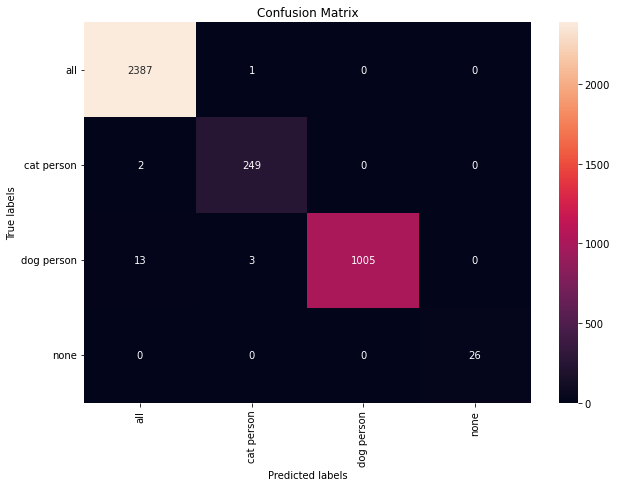

In [156]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

In [157]:
cart_model.get_depth()

164

In [158]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(cart_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.56368564 0.54816825 0.578019   0.52917232 0.51696065]
Baseline: 54.72% (2.22%)


In [159]:
cart_model20 = DecisionTreeClassifier(max_depth = 20).fit(X_train, Y_train) 
cart_predictions20 = cart_model20.predict(X_train) 

In [160]:
print(classification_report(Y_train, cart_predictions20))

              precision    recall  f1-score   support

         all       0.72      0.98      0.83      2388
  cat person       0.98      0.21      0.35       251
  dog person       0.86      0.33      0.47      1021
        none       1.00      0.42      0.59        26

    accuracy                           0.74      3686
   macro avg       0.89      0.48      0.56      3686
weighted avg       0.78      0.74      0.70      3686



In [161]:
results20 = cross_val_score(cart_model20, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results20)
print("Baseline: %.2f%% (%.2f%%)" % (results20.mean()*100, results.std()*100))

[0.62466125 0.62686567 0.63907734 0.6119403  0.59294437]
Baseline: 61.91% (2.22%)


In [162]:
knn_predictionsVal = knn_model.predict(X_val) 
print(classification_report(Y_val, knn_predictionsVal))

              precision    recall  f1-score   support

         all       0.66      0.87      0.75       596
  cat person       0.12      0.01      0.03        67
  dog person       0.35      0.17      0.23       253
        none       0.00      0.00      0.00         6

    accuracy                           0.61       922
   macro avg       0.28      0.26      0.25       922
weighted avg       0.53      0.61      0.55       922



/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


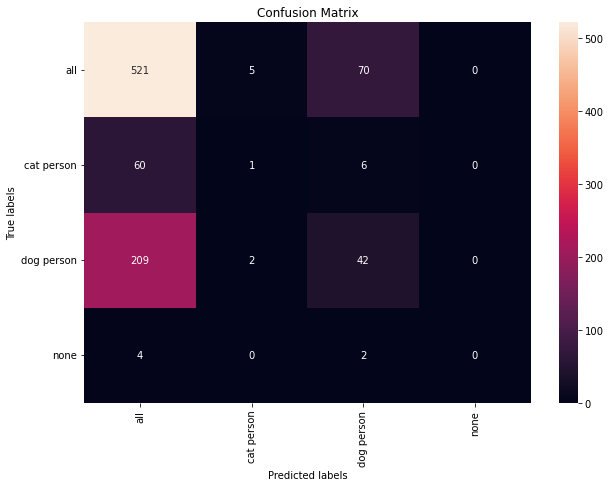

In [163]:
final_cm = confusion_matrix(Y_val, knn_predictionsVal)
knn_labels = knn_model.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels); 
ax.yaxis.set_ticklabels(knn_labels);